In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from numpy import moveaxis
from numpy import asarray
import pandas as pd
from keras.applications import densenet
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input

Using TensorFlow backend.


In [ ]:
def extractThree(x):
  mid = len(x) // 2

  return np.array([ x[mid-1] , x[mid] ,x[mid+1]])


In [ ]:
def getTrainingData(type1,type2):

  list = []

  for filename in sorted(os.listdir("/content/drive/My Drive/MINOR PROJECT/Knee MRI Dataset/MRNet-v1.0/"+type1+"/"+type2)):
    if(filename != ".DS_Store"):
      trainingExample = np.load("/content/drive/My Drive/MINOR PROJECT/Knee MRI Dataset/MRNet-v1.0/"+type1+"/"+type2+"/" + filename)
      x = image.img_to_array(trainingExample)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      list.append(extractThree(trainingExample))

  return list.copy()


sagittalTrainingData = getTrainingData("train","sagittal")
axialTrainingData = getTrainingData("train","axial")
coronalTrainingData = getTrainingData("train","coronal")

sagittalTestData = getTrainingData("valid","sagittal")
axialTestData = getTrainingData("valid","axial")
coronalTestData = getTrainingData("valid","coronal")


In [ ]:
def reshape_data(trainingData):
  data = asarray(trainingData)
  data = moveaxis(data, 1, 3)
  print(data.shape)

  return data



In [ ]:
sagittalData  = reshape_data(sagittalTrainingData)
axialData = reshape_data(axialTrainingData)
coronalData = reshape_data(coronalTrainingData)

sagittalTestData = reshape_data(sagittalTestData)
axialTestData = reshape_data(axialTestData)
coronalTestData = reshape_data(coronalTestData)


(1130, 256, 256, 3)
(1130, 256, 256, 3)
(1130, 256, 256, 3)
(120, 256, 256, 3)
(120, 256, 256, 3)
(120, 256, 256, 3)


In [ ]:
def readLabels(type1,type2):
  path = "/content/drive/My Drive/MINOR PROJECT/Knee MRI Dataset/MRNet-v1.0/"+type1+"-"+type2 + ".csv"
  df=pd.read_csv(path, sep=',',header=None)
  labelsValid = df.values
  labelsValid = labelsValid[:,1]
  return labelsValid


In [ ]:
abnormalLabels = readLabels('train','abnormal')
aclLabels = readLabels('train','acl')
meniscusLabels = readLabels('train','meniscus')


abnornmalTestLabels = readLabels('valid','abnormal')
aclTestLabels = readLabels('valid','acl')
meniscusTestLabels = readLabels('valid','meniscus')

In [ ]:
from keras import models
from keras import layers
from keras.models import Model
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.densenet import DenseNet169

def buildModel():
  vgg = DenseNet169(include_top=False, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

  for layer in vgg.layers:
    layer.trainable = False

  x = vgg.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dropout(0.6)(x)
  predictions = layers.Dense(1, activation= 'sigmoid')(x)
  model = Model(inputs = vgg.input, outputs = predictions)

  model.summary()

  model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
  return model



In [ ]:
model_abnormal_sagittal = buildModel()
history_abnormal_sagittal = model_abnormal_sagittal.fit(sagittalData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_abnormal_axial = buildModel()
history_abnormal_axial = model_abnormal_axial.fit(axialData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_abnormal_coronal = buildModel()
history_abnormal_coronal = model_abnormal_coronal.fit(coronalData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])















51879936/51877672 [==============================] - 2s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
_________________________________________________________________________________________________

In [ ]:
model_acl_sagittal = buildModel()
history_acl_sagittal = model_acl_sagittal.fit(sagittalData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_acl_axial = buildModel()
history_acl_axial = model_acl_axial.fit(axialData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_acl_coronal = buildModel()
history_acl_coronal = model_acl_coronal.fit(coronalData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_7 (ZeroPadding2D (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_7[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model_meniscus_sagittal = buildModel()
history_meniscus_sagittal = model_meniscus_sagittal.fit(sagittalData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_meniscus_axial = buildModel()
history_meniscus_axial = model_meniscus_axial.fit(axialData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_meniscus_coronal = buildModel()
history_meniscus_coronal = model_meniscus_coronal.fit(coronalData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_13 (ZeroPadding2 (None, None, None, 3 0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_13[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


def getEvaluationScore(labels,predictions):

  my_score = accuracy_score(labels, predictions)
  print("my score: ",my_score)


  fscore = f1_score(labels, predictions)

  print("fscore: ",fscore)

  return my_score


In [ ]:
def predictLabels(data,model,threshold):
  labels = model.predict(data)
  for i in labels:
    print(i)

  labels = list(map(lambda x: 0 if x<threshold else 1, labels))
  print(labels)
  return labels

In [ ]:
predictions_abnormal_sagittal = predictLabels(sagittalTestData,model_abnormal_sagittal, 0.75)
print("---------------------------------------------------------------------------------")
predictions_abnormal_axial = predictLabels(axialTestData,model_abnormal_axial, 0.75)
print("---------------------------------------------------------------------------------")
predictions_abnormal_coronal = predictLabels(coronalTestData,model_abnormal_coronal, 0.75)

print("############################################")
predictions_acl_sagittal = predictLabels(sagittalTestData,model_acl_sagittal, 0.15)
print("---------------------------------------------------------------------------------")
predictions_acl_axial = predictLabels(axialTestData,model_acl_axial, 0.15)
print("---------------------------------------------------------------------------------")
predictions_acl_coronal = predictLabels(coronalTestData,model_acl_coronal, 0.15)

print("############################################")
predictions_meniscus_sagittal = predictLabels(sagittalTestData,model_meniscus_sagittal, 0.4)
print("---------------------------------------------------------------------------------")
predictions_meniscus_axial = predictLabels(axialTestData,model_meniscus_axial, 0.4)
print("---------------------------------------------------------------------------------")
predictions_meniscus_coronal = predictLabels(coronalTestData,model_meniscus_coronal, 0.4)

[1.]
[1.]
[1.]
[1.]
[0.9999924]
[0.99999905]
[0.9999893]
[0.9999999]
[0.99999976]
[0.99999344]
[0.9999993]
[0.9999855]
[0.99999976]
[0.99999565]
[0.9999983]
[0.99999845]
[1.]
[0.99999714]
[1.]
[1.]
[0.99996793]
[0.99998534]
[0.9999999]
[1.]
[0.9999999]
[0.99999654]
[0.9999877]
[0.9999928]
[0.9999998]
[0.999948]
[0.9999993]
[1.]
[0.9999986]
[0.9999989]
[0.99999976]
[0.9999983]
[0.99997866]
[0.99999666]
[1.]
[1.]
[1.]
[0.9999764]
[1.]
[0.99999654]
[0.9999365]
[0.99999905]
[0.99999374]
[0.9999511]
[0.99999803]
[0.9999986]
[0.9999999]
[0.9999998]
[0.99999976]
[0.9999892]
[0.9999941]
[0.99999845]
[0.99999946]
[1.]
[0.999949]
[0.99999905]
[0.9999999]
[0.99999046]
[1.]
[1.]
[0.99998814]
[0.9999886]
[0.9999995]
[0.9999999]
[0.9999996]
[0.99999964]
[1.]
[0.99999994]
[0.99996716]
[0.999936]
[0.9999956]
[1.]
[0.9999995]
[0.99996865]
[0.9999997]
[0.9999999]
[0.9999198]
[0.999969]
[0.9999999]
[0.99999785]
[0.99999976]
[0.99999857]
[0.9999999]
[1.]
[1.]
[0.9999968]
[0.9999995]
[0.9999988]
[0.9999912

In [ ]:
def ensemble(predictions1,predictions2,predictions3):
  list=[]
  for i in range(0,len(predictions1),1):
    total = sum([predictions1[i],predictions2[i],predictions3[i]])
    if total > 1:
      list.append(1)
    else:
      list.append(0)

  return list.copy()

labels_abnormal_ensemble = ensemble(predictions_abnormal_sagittal,predictions_abnormal_axial,predictions_abnormal_coronal)
print("labels_abnormal_ensemble: ",labels_abnormal_ensemble)
score_abnormal = getEvaluationScore(abnornmalTestLabels, labels_abnormal_ensemble)


labels_acl_ensemble = ensemble(predictions_acl_sagittal,predictions_acl_axial,predictions_acl_coronal)
print("labels_acl_ensemble: ",labels_acl_ensemble)
score_acl = getEvaluationScore(aclTestLabels, labels_acl_ensemble)



labels_meniscus_ensemble = ensemble(predictions_meniscus_sagittal,predictions_meniscus_axial,predictions_meniscus_coronal)
print("labels_meniscus_ensemble: ",labels_meniscus_ensemble)
score_meniscus = getEvaluationScore(meniscusTestLabels, labels_meniscus_ensemble)




labels_abnormal_ensemble:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
my score:  0.7916666666666666
fscore:  0.8837209302325582
labels_acl_ensemble:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
my score:  0.55
fscore:  0.0
labels_meniscus_ensemble:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
def EvaluationScore(labels,predictions):

  score = accuracy_score(labels, predictions)
  return score

score1ab = EvaluationScore(abnornmalTestLabels, predictions_abnormal_sagittal)
score2ab = EvaluationScore(abnornmalTestLabels, predictions_abnormal_axial)
score3ab = EvaluationScore(abnornmalTestLabels, predictions_abnormal_coronal)

score1acl = EvaluationScore(abnornmalTestLabels, predictions_acl_sagittal)
score2acl = EvaluationScore(abnornmalTestLabels, predictions_acl_axial)
score3acl = EvaluationScore(abnornmalTestLabels, predictions_acl_coronal)

score1mini = EvaluationScore(abnornmalTestLabels, predictions_meniscus_sagittal)
score2mini = EvaluationScore(abnornmalTestLabels, predictions_meniscus_axial)
score3mini = EvaluationScore(abnornmalTestLabels, predictions_meniscus_coronal)

ab=max(score1ab,score2ab,score3ab)
ac=max(score1acl,score2acl,score3acl)
meni=max(score1mini,score2mini,score3mini)

print("probability of injury type to be \n abnormal = ",ab,"\n acl = ",ac,"\n meniscus = ",meni);


'''def maximum(data,model,threshold):
  m=model.predict(data)
  ma=max(m)
  return ma
sagi1max = maximum(sagittalTestData,model_abnormal_sagittal, 0.75)
axi1max = maximum(axialTestData,model_abnormal_axial, 0.75)
coro1max = maximum(coronalTestData,model_abnormal_coronal, 0.75)

sagi2max = maximum(sagittalTestData,model_abnormal_sagittal, 0.15)
axi2max = maximum(axialTestData,model_abnormal_axial, 0.15)
coro2max = maximum(coronalTestData,model_abnormal_coronal, 0.15)

sagi3max = maximum(sagittalTestData,model_abnormal_sagittal, 0.4)
axi3max = maximum(axialTestData,model_abnormal_axial, 0.4)
coro3max = maximum(coronalTestData,model_abnormal_coronal, 0.4)

print(1max)

'''

probability of injury type to be 
 abnormal =  0.7916666666666666 
 acl =  0.2833333333333333 
 meniscus =  0.49166666666666664


'def maximum(data,model,threshold):\n  m=model.predict(data) \n  ma=max(m)\n  return ma\nsagi1max = maximum(sagittalTestData,model_abnormal_sagittal, 0.75)\naxi1max = maximum(axialTestData,model_abnormal_axial, 0.75)\ncoro1max = maximum(coronalTestData,model_abnormal_coronal, 0.75)\n\nsagi2max = maximum(sagittalTestData,model_abnormal_sagittal, 0.15)\naxi2max = maximum(axialTestData,model_abnormal_axial, 0.15)\ncoro2max = maximum(coronalTestData,model_abnormal_coronal, 0.15)\n\nsagi3max = maximum(sagittalTestData,model_abnormal_sagittal, 0.4)\naxi3max = maximum(axialTestData,model_abnormal_axial, 0.4)\ncoro3max = maximum(coronalTestData,model_abnormal_coronal, 0.4)\n\nprint(1max)\n\n'

In [ ]:
def plot_accuracy(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.grid(True)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.grid(True)
  plt.show()

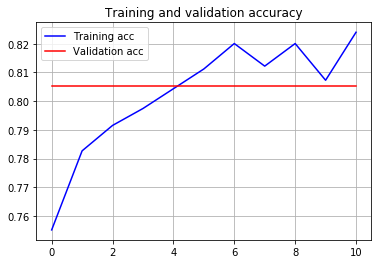

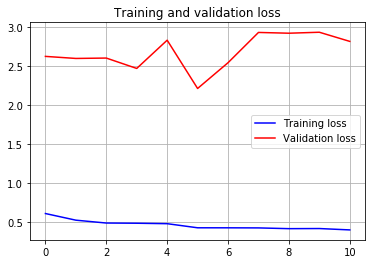

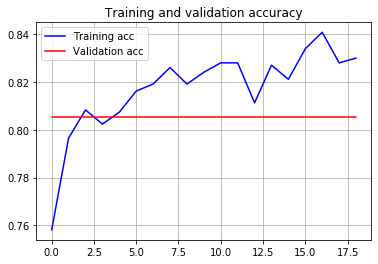

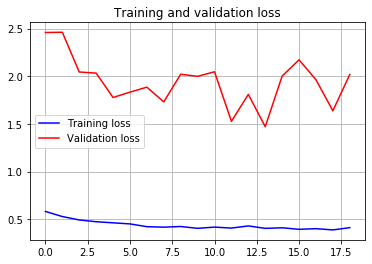

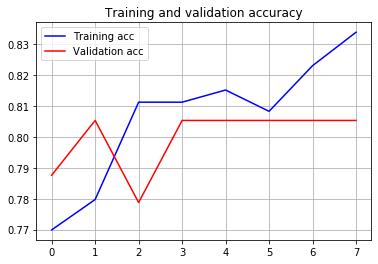

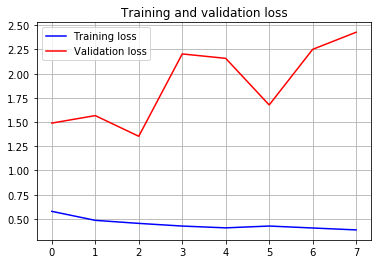

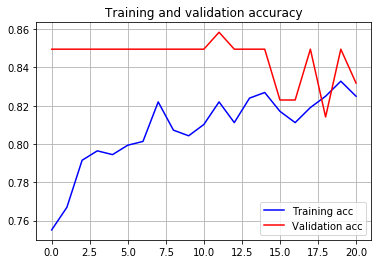

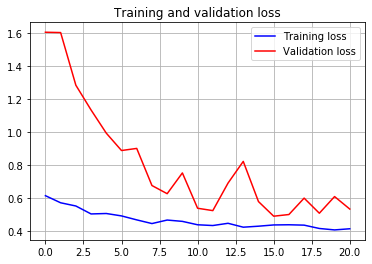

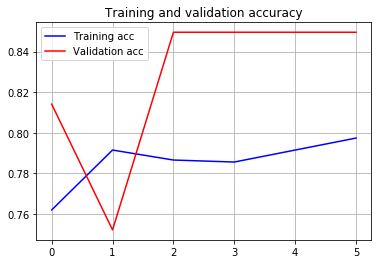

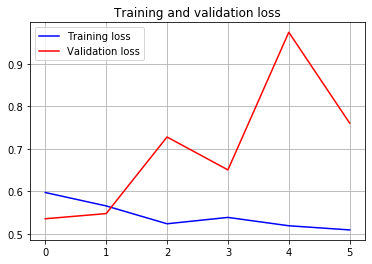

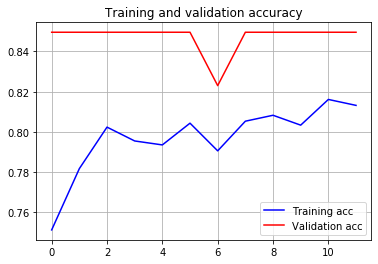

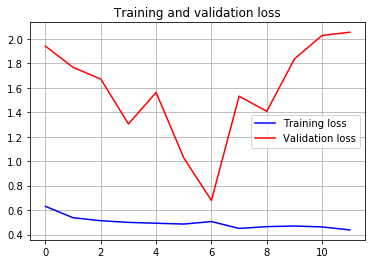

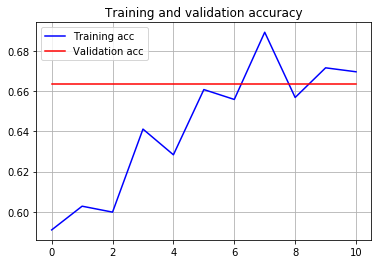

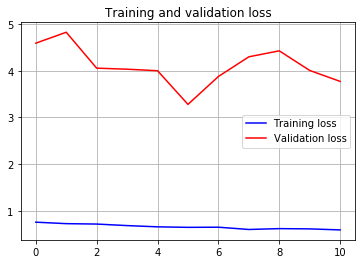

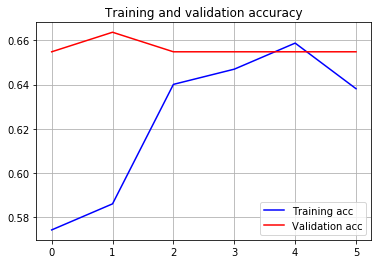

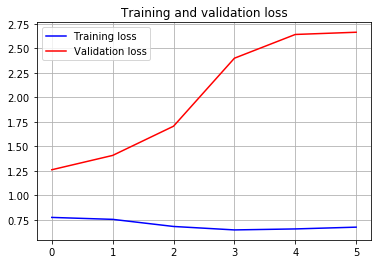

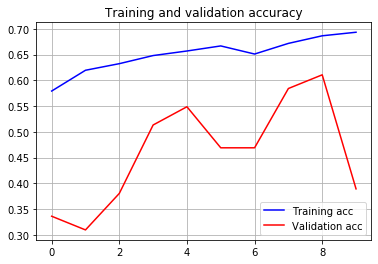

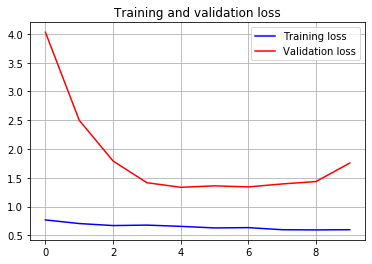

In [ ]:

plot_accuracy(history_abnormal_sagittal)
plot_accuracy(history_abnormal_coronal)
plot_accuracy(history_abnormal_axial)

plot_accuracy(history_acl_sagittal)
plot_accuracy(history_acl_coronal)
plot_accuracy(history_acl_axial)

plot_accuracy(history_meniscus_sagittal)
plot_accuracy(history_meniscus_coronal)
plot_accuracy(history_meniscus_axial)


[[ 0 25]
 [ 0 95]]
[[66  0]
 [54  0]]
[[68  0]
 [52  0]]


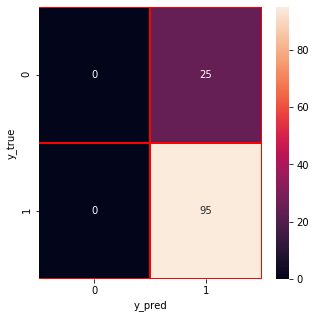

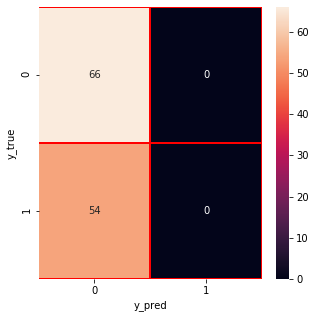

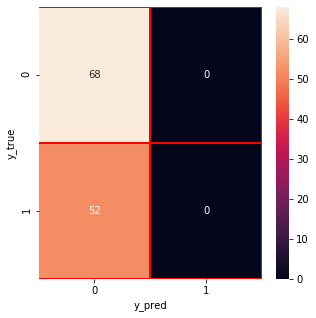

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred= [labels_abnormal_ensemble,labels_acl_ensemble,labels_meniscus_ensemble]
y_true=[abnornmalTestLabels,aclTestLabels,meniscusTestLabels]
cm1=confusion_matrix(y_true[0],y_pred[0])
cm2=confusion_matrix(y_true[1],y_pred[1])
cm3=confusion_matrix(y_true[2],y_pred[2])
print(cm1)
print(cm2)
print(cm3)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm1,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm2,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm3,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        68
           1       0.00      0.00      0.00        52

    accuracy                           0.57       120
   macro avg       0.28      0.50      0.36       120
weighted avg       0.32      0.57      0.41       120

roc_auc1 = 0.5
roc_au

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 0, 'False Positive Rate')

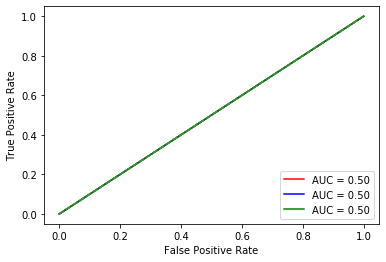

In [ ]:
auc_roc1=classification_report(y_true[0],y_pred[0])
auc_roc2=classification_report(y_true[1],y_pred[1])
auc_roc3=classification_report(y_true[2],y_pred[2])
print(auc_roc1,auc_roc2,auc_roc3,sep='')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true[0], y_pred[0])
roc_auc1 = auc(false_positive_rate, true_positive_rate)
print("roc_auc1 =",roc_auc1)
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true[1], y_pred[1])
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print("roc_auc2 =",roc_auc2)
plt.plot(false_positive_rate,true_positive_rate, color='blue',label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true[2], y_pred[2])
roc_auc3 = auc(false_positive_rate, true_positive_rate)
print("roc_auc1 =",roc_auc1)
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

No handles with labels found to put in legend.


0.5
0.5
0.5


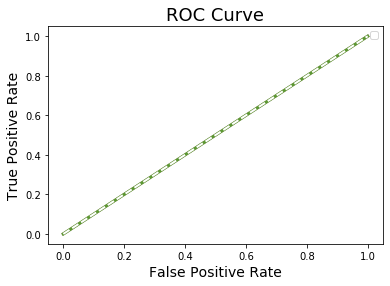

In [ ]:
fpr, tpr, thresholds_roc = roc_curve(y_true[0], y_pred[0])
roc_auc1 = auc(fpr,tpr)
print(roc_auc1)
plt.plot(fpr,tpr, lw = 3, alpha = 0.7)


fpr, tpr, thresholds_roc = roc_curve(y_true[1], y_pred[1])
roc_auc2 = auc(fpr,tpr)
print(roc_auc2)
plt.plot(fpr,tpr, lw = 3, alpha = 0.7)

fpr, tpr, thresholds_roc = roc_curve(y_true[2], y_pred[2])
roc_auc3 = auc(fpr,tpr)
print(roc_auc3)
plt.plot(fpr,tpr, lw = 3, alpha = 0.7)
plt.plot([0,1], [0,1], 'w', linestyle = "--", lw = 2)
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve", fontsize = 18)
plt.legend(loc = 'best')

